In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from keras.datasets import reuters

Using TensorFlow backend.


In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [5]:
print('Train:')
print(train_data.shape)
print(train_labels.shape)
print('Test')
print(test_data.shape)
print(test_labels.shape)

Train:
(8982,)
(8982,)
Test
(2246,)
(2246,)


In [6]:
print(np.max(np.max(train_data)))
print(np.max(np.max(test_data)))
print(np.max(train_labels))
print(np.max(test_labels))

9975
9931
45
45


In [7]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
print(len(train_data[0]))
print(len(train_data[1]))

87
56


In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [10]:
def print_decoded_newswire(index):
    decoded_newswire = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[index]])
    print(decoded_newswire)

In [11]:
for i in range(3):
    print_decoded_newswire(i)
    print('\n')

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share am

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # sequence is a list of indexes (a list can be fed a list of indexes)
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [16]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)
print(one_hot_train_labels[0])
print(np.argmax(one_hot_train_labels[0]))

(8982, 46)
(2246, 46)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3


In [18]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) # does the same as to_one_hot function
one_hot_test_labels = to_categorical(test_labels)

In [19]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)
print(one_hot_train_labels[0])
print(np.argmax(one_hot_train_labels[0]))

(8982, 46)
(2246, 46)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3


In [47]:
from keras import models
from keras import layers
from keras import optimizers

In [105]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [106]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [107]:
x_val = x_train[:1000] # use a shuffle function (numpy or scikit) if the sets are not already shuffled
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [108]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=8,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 264us/step - loss: 2.8297 - acc: 0.4992 - val_loss: 1.8964 - val_acc: 0.6230
Epoch 2/8
7982/7982 [==============================] - 2s 203us/step - loss: 1.5349 - acc: 0.6862 - val_loss: 1.3553 - val_acc: 0.7030
Epoch 3/8
7982/7982 [==============================] - 2s 209us/step - loss: 1.0993 - acc: 0.7682 - val_loss: 1.1413 - val_acc: 0.7470
Epoch 4/8
7982/7982 [==============================] - 2s 204us/step - loss: 0.8505 - acc: 0.8183 - val_loss: 1.0297 - val_acc: 0.7750
Epoch 5/8
7982/7982 [==============================] - 2s 207us/step - loss: 0.6719 - acc: 0.8608 - val_loss: 0.9530 - val_acc: 0.8030
Epoch 6/8
7982/7982 [==============================] - 2s 202us/step - loss: 0.5351 - acc: 0.8911 - val_loss: 0.9528 - val_acc: 0.8050
Epoch 7/8
7982/7982 [==============================] - 2s 203us/step - loss: 0.4307 - acc: 0.9133 - val_loss: 0.8759 - val_acc: 0.8100
Epoch 8

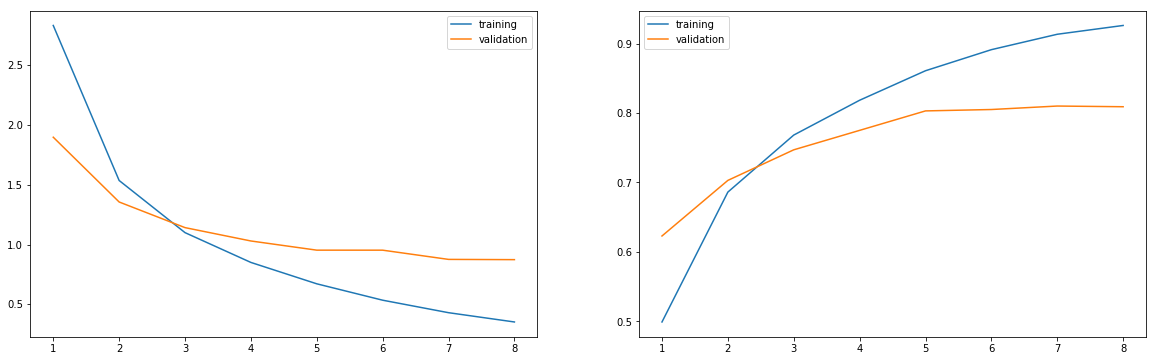

In [109]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values)
plt.plot(epochs, val_loss_values)
plt.legend(['training', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values)
plt.plot(epochs, val_acc_values)
plt.legend(['training', 'validation'])

In [104]:
result = model.evaluate(x_test, one_hot_test_labels)
print(result)

2246/2246 [==============================] - 0s 217us/step
[1.0209842309926305, 0.78984861982155352]
